In [1]:
%matplotlib inline

import pandas as pd

In [2]:
df = pd.read_csv('data/beer.csv', index_col=0)
df

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
4,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
...,...,...,...,...,...,...,...
2247,0.067,45.0,928,Belgorado,Belgian IPA,424,12.0
2248,0.052,NaN,807,Rail Yard Ale,American Amber / Red Ale,424,12.0
2249,0.055,NaN,620,B3K Black Lager,Schwarzbier,424,12.0
2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.0


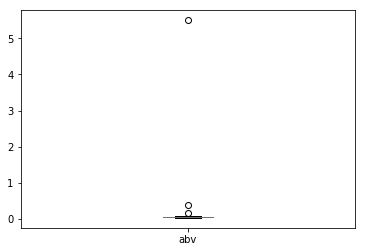

In [3]:
df.plot(kind='box', y='abv')

In [4]:
df['abv'].describe()

count    2190.000000
mean        0.060186
std         0.117010
min         0.032000
25%         0.050000
50%         0.055000
75%         0.065000
max         5.500000
Name: abv, dtype: float64

In [5]:
q1 = df['abv'].quantile(0.25)  ## Q1
q3 = df['abv'].quantile(0.75)  ## Q3

In [6]:
iqr = q3 - q1  ## IQR

In [7]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)  ## finding outlier

In [8]:
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26
2250,5.500,40.0,145,Silverback Pale Ale,American Pale Ale (APA),424,12.00


In [9]:
df.loc[2250, 'abv'] = 0.055  ## fix fault data
df.loc[2250]

abv                             0.055
ibu                                40
id                                145
name              Silverback Pale Ale
style         American Pale Ale (APA)
brewery_id                        424
ounces                             12
Name: 2250, dtype: object

In [10]:
condition = (df['abv'] < q1 - 1.5 * iqr) | (df['abv'] > q3 + 1.5 * iqr)  ## finding outlier
df[condition]

,abv,ibu,id,name,style,brewery_id,ounces
963,0.172,NaN,3691,Chamisul Fresh,Soju,993,12.17
1856,0.400,NaN,3012,Grey Goose,Vodka,893,25.26


In [11]:
df[condition].index  ## remove fault data

Int64Index([963, 1856], dtype='int64')

In [12]:
df.drop(df[condition].index, inplace=True)

In [13]:
df[condition]

/Users/hanbeomman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,abv,ibu,id,name,style,brewery_id,ounces


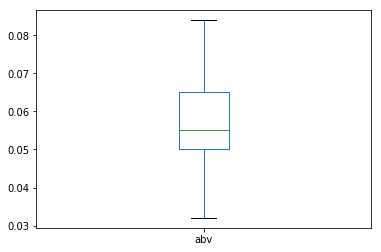

In [14]:
df.plot(kind='box', y='abv')

In [15]:
## relational outlier (**)
## 키 188 cm (ok) , 몸무게 42 kg (ok) -> 188 cm & 42 kg (..??)

In [16]:
df = pd.read_csv('data/exam_outlier.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


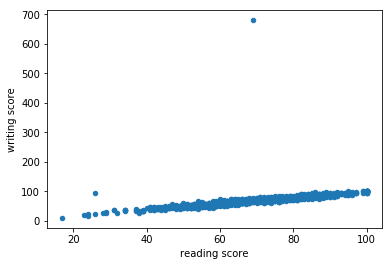

In [17]:
df.plot(kind='scatter', x='reading score', y='writing score')

In [18]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.810412,0.513623
reading score,0.810412,1.000000,0.582378
writing score,0.513623,0.582378,1.000000


In [19]:
df[df['writing score'] > 100]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
51,male,group E,associate's degree,free/reduced,completed,77,69,680


In [20]:
df.drop(51, inplace=True)

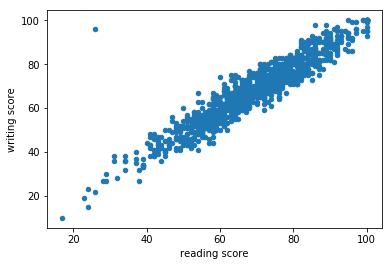

In [21]:
df.plot(kind='scatter', x='reading score', y='writing score')

In [22]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.810627,0.802853
reading score,0.810627,1.000000,0.943248
writing score,0.802853,0.943248,1.000000


In [23]:
df[(df['writing score'] > 90) & (df['reading score'] < 40)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
373,female,group D,some college,standard,completed,82,26,96


In [24]:
df.drop(373, inplace=True)  ## remove ralational outlier

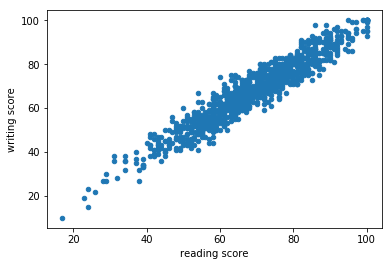

In [25]:
df.plot(kind='scatter', x='reading score', y='writing score')

In [26]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817735,0.802722
reading score,0.817735,1.000000,0.954440
writing score,0.802722,0.954440,1.000000
